## **06-3) 주성분 분석**

차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 본다.

#### **용어 정리**
- **차원 축소**: 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류. 차원 축소는 저장 공간을 줄이고 시각화하기 쉬우며, 다른 알고리즘의 성능을 높일 수도 있다. <br>

- **주성분 분석**: 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향인 주성분을 찾는 방법이다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다. 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다.
- **설명된 분산**: 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것이다. 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.

<hr><br>

### **차원과 차원 축소**

+) 1차원 배열(벡터)의 경우에는 차원이 원소의 개수를 의미하고, 다차원 배열일 경우에는 차원은 배열의 축 개수가 된다.

데이터가 가진 속성 = 특성 = **차원**(dimension)이라고 할 수 있다.<br>
즉 10,000개 특성은 10,000개의 차원이라는 것인데 이 차원을 줄이면 저장 공간을 크게 절약할 수 있다.

이를 위해 비지도 학습 작업 중 하나인 **차원 축소**(dimensionality reduction) 알고리즘을 다뤄볼 것이다.<br><br>
**차원 축소**는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있다.<br>
또한 줄어든 차원을 손실을 최소화하면서 원본 차원으로 복원할 수도 있다.

<hr><br>
대표적인 차원 축소 알고리즘인 주성분 분석에 대해 알아보자.

### **주성분 분석**(**PCA**; Principle Component Analysis)

주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것이다.<br>
분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있으며, 이 벡터를 **주성분**이라고 부른다.

주성분 벡터는 원본 데이터에 있는 어떤 방향이며, 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.<br>
예를 들면, 2차원에서 주성분은 2개이다.
<br><br>
주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다. 
<br>주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

<hr><br>

### **PCA 클래스**

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-07-02 06:11:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-02 06:11:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-02 06:11:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다.<br>
비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않는다.

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 **`components_`** 속성에 저장되어 있다.<br>
이 배열의 크기를 확인해보자.

In [3]:
print(pca.components_.shape)

(50, 10000)


주성분 개수를 50으로 지정했기 때문에 배열의 첫 번째 차원이 50이다. 50개의 주성분을 찾았다는 의미이다.<br>
두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.

원본 데이터와 차원이 같으므로 주성분을 100*100 크기의 이미지처럼 출력해볼 수 있다.<br>
2절에서 정의했던 draw_fruits() 함수를 이용하자.

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # ratio 기본값 = 1
  n = len(arr) # n은 샘플 개수

  # 한 줄에 10개씩 이미지 그릴 것
  rows = int(np.ceil(n/10)) # 전체 행 개수 계산
  # 행이 1개이면 열의 개수=샘플 개수, 그렇지 않으면 열의 개수=10
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개까지만 그림
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  
  plt.show()

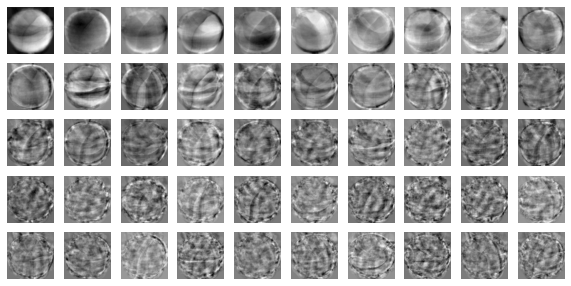

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.<br>
이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다.

In [6]:
print(fruits_2d.shape) # 특성 개수 줄이기 전

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


10,000개의 픽셀(특성)을 가진 300개의 이미지를 50개의 주성분을 찾은 PCA 모델을 사용해 50개의 픽셀(특성)을 가진 데이터로 변환했다.

<hr><br>
데이터 차원을 줄였다면 다시 원상 복구할 수도 있다.

### **원본 데이터 재구성**

차원을 축소하는 과정에서 어느 정도 손실이 발생할 수밖에 없지만<br>
최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스의 inverse_transform() 메서드를 사용해 다시 10,000개의 특성을 복원해보자.

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


이 데이터를 100x100 크기로 바꾸어 100개씩 나누어 출력해볼 것이다.

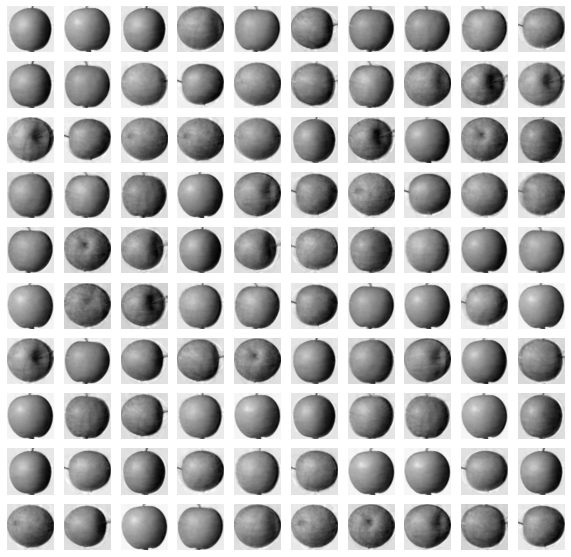

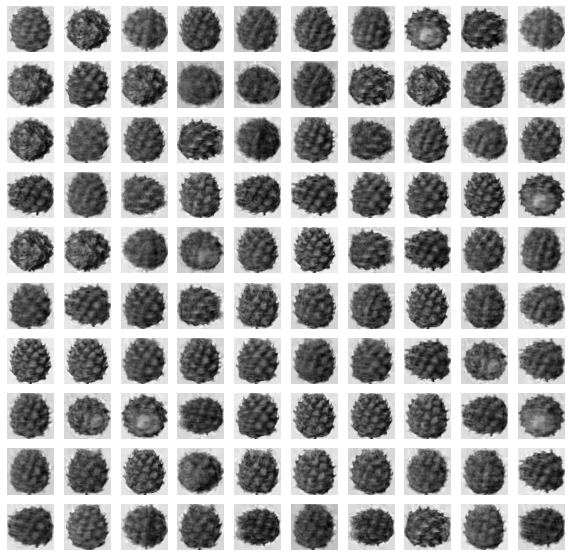

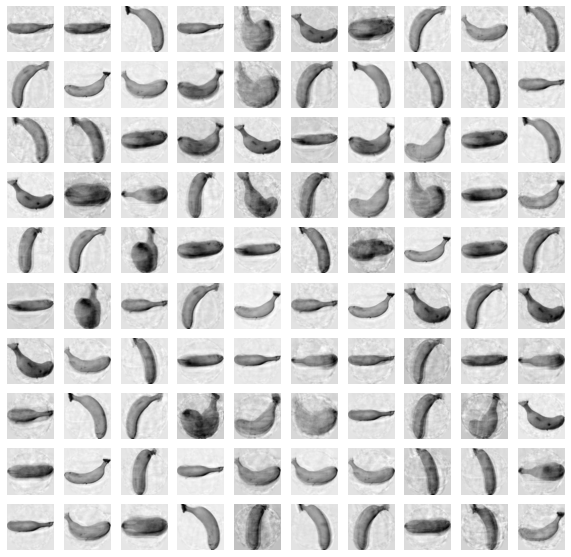

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

<hr><br>

### **설명된 분산**(explained variance)

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산**이라고 한다.<br><br>
PCA 클래스의 **`explained_variance_ratio_`**에 각 주성분의 설명된 분산 비율이 기록되어 있다.<br>
첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비용을 얻을 수 있다.

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.9215586822903287


92%가 넘는 분산을 유지하고 있음을 알 수 있다.

설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 된다.

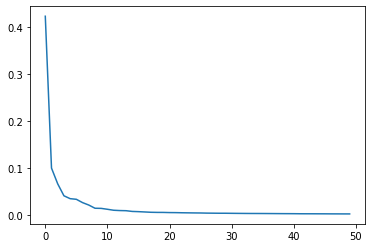

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 대부분의 분산을 표현하고 있고, 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다.

<hr><br>
이번에는 PCA로 차원 축소된 데이터를 사용해 지도학습 모델을 훈련해볼 것이다.

### **다른 알고리즘과 함께 사용하기**

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 어떤 차이가 있는지 알아보자.<br><br>
3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용할 것이다.

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃값(사과:0, 파인애플:1, 바나나:2)
target = np.array([0]*100 + [1]*100 + [2]*100)

먼저 원본 데이터인 fruits_2d를 사용해본다.

In [18]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))  # 교차 검증 점수
print(np.mean(scores['fit_time']))    # 교차 검증 폴드의 훈련 시간

0.9966666666666667
1.4852555751800538


이 값을 PCA로 축소한 fruits_pca를 사용해보고 비교해보자.

In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))  # 교차 검증 점수
print(np.mean(scores['fit_time']))    # 교차 검증 폴드의 훈련 시간

1.0
0.028329133987426758


50개의 특성만 사용했는데도 정확도가 100%이고, 훈련 시간도 큰 폭으로 감소했다.

<br>

PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수 외에도 원하는 설명된 분산의 비율을 입력할 수도 있다.<br>
PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.<br>

설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어보자.

In [20]:
pca = PCA(n_components=0.5) # 0~1 사이 비율을 실수로 입력하면 된다.
pca.fit(fruits_2d)

PCA(n_components=0.5)

몇 개의 주성분을 찾았는지 확인해보자.

In [21]:
print(pca.n_components_)

2


2개의 특성만으로 원본 데이터에 있는 분산 50%를 표현할 수 있다.

이 모델로 원본 데이터를 변환할 것이다. 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)가 될 것이다.

In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))  # 교차 검증 점수
print(np.mean(scores['fit_time']))    # 교차 검증 폴드의 훈련 시간

0.9933333333333334
0.04262495040893555


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2개의 특성을 사용했을 뿐인데도 99%의 정확도를 달성했다.

이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아볼 것이다.

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


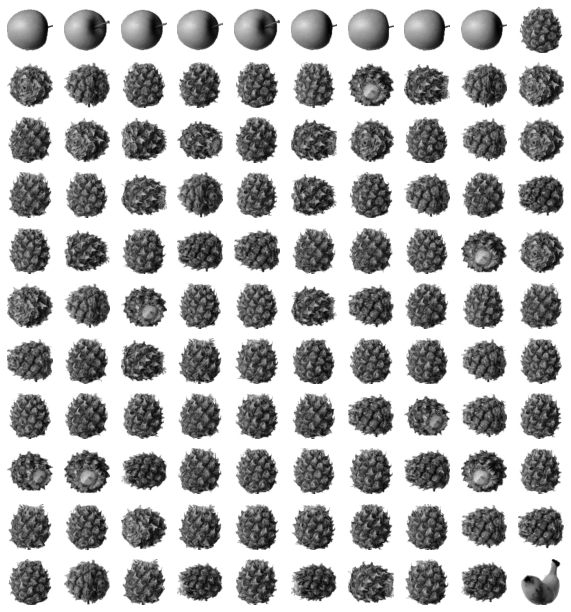

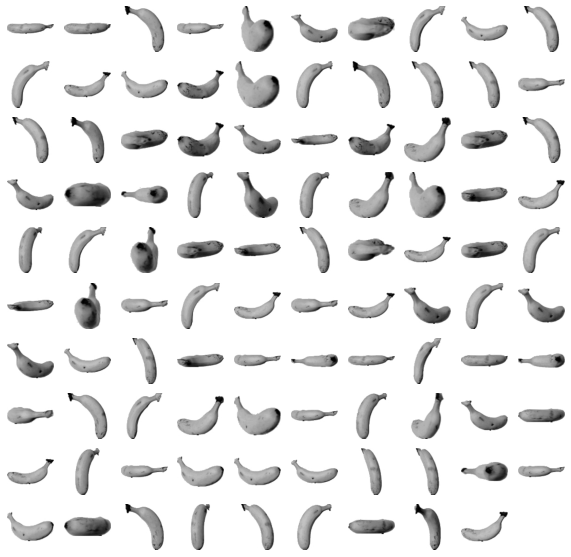

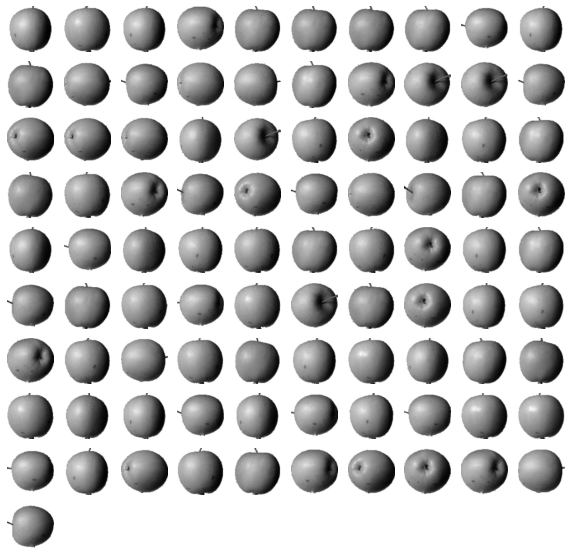

In [28]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

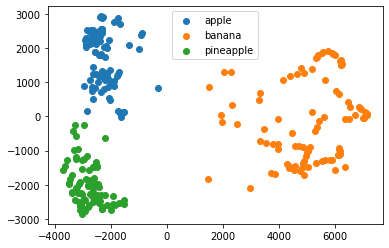

In [30]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()